In [21]:
import numpy as np
import random

class GridWorld:
    def __init__(self, size=4):
        self.size = size
        self.states = [(i, j) for i in range(size) for j in range(size)]
        self.actions = ['up', 'down', 'left', 'right']
        self.rewards = np.zeros((size, size))
        self.rewards[size-1, size-1] = 1  # 终点奖励

    def is_terminal(self, state):
        return state == (self.size-1, self.size-1)

    def next_state(self, state, action):
        i, j = state
        if action == 'up':
            next_state = (max(i-1, 0), j)
        elif action == 'down':
            next_state = (min(i+1, self.size-1), j)
        elif action == 'left':
            next_state = (i, max(j-1, 0))
        elif action == 'right':
            next_state = (i, min(j+1, self.size-1))
        return next_state


In [22]:
def q_learning(env, num_episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = {}
    for state in env.states:
        Q[state] = {action: 0.0 for action in env.actions}

    for episode in range(num_episodes):
        state = random.choice(env.states)
        while not env.is_terminal(state):
            if random.uniform(0, 1) < epsilon:
                action = random.choice(env.actions)
            else:
                action = max(Q[state], key=Q[state].get)

            next_state = env.next_state(state, action)
            reward = env.rewards[next_state]

            next_action = max(Q[next_state], key=Q[next_state].get)
            td_target = reward + gamma * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            state = next_state

    return Q


In [23]:
env = GridWorld()
Q = q_learning(env)

# 提取最优策略
def extract_policy(Q):
    policy = {}
    for state in Q:
        policy[state] = max(Q[state], key=Q[state].get)
    return policy

optimal_policy = extract_policy(Q)

print("最优策略:")
for i in range(env.size):
    for j in range(env.size):
        state = (i, j)
        if env.is_terminal(state):
            print("终点", end=" ")
        else:
            print(optimal_policy[state], end=" ")
    print()


最优策略:
right right right down 
up up up down 
up up up down 
up up up 终点 


In [24]:
def test_policy(env, policy):
    state = (0, 0)
    path = [state]
    while not env.is_terminal(state):
        action = policy[state]
        state = env.next_state(state, action)
        path.append(state)
    return path

path = test_policy(env, optimal_policy)
print("机器人从起点到终点的路径:")
print(path)


机器人从起点到终点的路径:
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


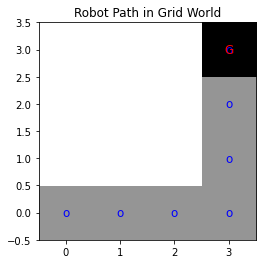

In [36]:
# 绘制机器人路径
import matplotlib.pyplot as plt
import os
def plot_path(env, path, filename):
    grid = np.zeros((env.size, env.size))
    for (i, j) in path:
        grid[i, j] = 0.5
    grid[env.size-1, env.size-1] = 1  # 终点标记为1

    plt.imshow(grid, cmap='Greys', interpolation='none')
    plt.gca().invert_yaxis()

    for (i, j) in path:
        plt.text(j, i, 'o', ha='center', va='center', color='blue', fontsize=12)
    
    plt.text(env.size-1, env.size-1, 'G', ha='center', va='center', color='red', fontsize=12)
    
    plt.title('Robot Path in Grid World')
    plt.savefig(filename)
    plt.show()

filename = "robot_move.png"
output_dir = os.getcwd()
os.path.join(output_dir, filename) # Absolute path
plot_path(env, path, filename)
